In [6]:
#local env variables
#first time? run on terminal : pip install -r requirements.txt
from dotenv import dotenv_values
config = dotenv_values(".env.local")

# Building references

### Config👾

In [7]:
#cspell:disable
from models.inventory import Project
### Import Data 💾
from source.qsc_cecofin import data

### init project
project:Project = Project(**data['project'])

getting weather data...
api request URL https://power.larc.nasa.gov/api/temporal/hourly/point?Time=LST&parameters=T2M,ALLSKY_SFC_SW_DNI,ALLSKY_SFC_SW_DIFF,ALLSKY_SRF_ALB,SZA,WS10M&community=RE&latitude=-33.43839824635554&longitude=-71.68396380506573&start=20230101&end=20231231&format=JSON
getting currencies data...
set $1 Pesos chileno.. on USD$0.00 
set $1 UF............. on USD$41.57 
set $1 UTM............ on USD$72.86 
set $1 Euro........... on USD$1.13 
set $1 Pound.......... on USD$1.34 
set $1 Real........... on USD$0.18 


### Consumptions && bills 🔌

In [8]:
project.building.add_consumptions(**data['consumptions'])

# Integration 

### Machine Components 🎡

In [9]:
#cspell: disable
from IPython.display import clear_output

#clean previous load
clear_output(wait=True)
project.components = {}

# assembly projects components
project.add_generator(*data['components']['generator'])
#nominal power
pj_power = project.nominal_power
# Energy process
project.add_component(*data['components']['install'])
# BESS & Storage
# project.add_storage(*data['components']['storage'])
# obras y accesorios
project.add_component(*data['components']['accesories'])
#Define bucket overloads
project.bucket.set_overloads(**data['components']['overloads'])

inside cost pv :  208547.06 Currency.CLP


# Write Document 📒


boundaries in month 1 : 1891 <-> 2745
boundaries in month 3 : 2745 <-> 1891
boundaries in month 4 : 2318.0 <-> 1891
boundaries in month 5 : 2104.5 <-> 1891
boundaries in month 6 : 1997.75 <-> 1891
boundaries in month 7 : 1944.375 <-> 1891
boundaries in month 8 : 1917.6875 <-> 1891
boundaries in month 9 : 1904.34375 <-> 1891
boundaries in month 10 : 1897.671875 <-> 1891
boundaries in month 11 : 1894.3359375 <-> 1891
boundaries in month 1 : 1891 <-> 2745
boundaries in month 3 : 2745 <-> 1891
boundaries in month 4 : 2318.0 <-> 1891
boundaries in month 5 : 2104.5 <-> 1891
boundaries in month 6 : 1997.75 <-> 1891
boundaries in month 7 : 1944.375 <-> 1891
boundaries in month 8 : 1917.6875 <-> 1891
boundaries in month 9 : 1904.34375 <-> 1891
boundaries in month 10 : 1897.671875 <-> 1891
boundaries in month 11 : 1894.3359375 <-> 1891


d:\Dev\energy-report-modeler\models\plotter.py:231: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  pivot = module.fillna(0).pivot_table(


boundaries in month 1 : 1891 <-> 2745
boundaries in month 3 : 2745 <-> 1891
boundaries in month 4 : 2318.0 <-> 1891
boundaries in month 5 : 2104.5 <-> 1891
boundaries in month 6 : 1997.75 <-> 1891
boundaries in month 7 : 1944.375 <-> 1891
boundaries in month 8 : 1917.6875 <-> 1891
boundaries in month 9 : 1904.34375 <-> 1891
boundaries in month 10 : 1897.671875 <-> 1891
boundaries in month 11 : 1894.3359375 <-> 1891


d:\Dev\energy-report-modeler\models\plotter.py:315: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  fig.legend()


plot_done
boundaries in month 1 : 1891 <-> 2745
boundaries in month 3 : 2745 <-> 1891
boundaries in month 4 : 2318.0 <-> 1891
boundaries in month 5 : 2104.5 <-> 1891
boundaries in month 6 : 1997.75 <-> 1891
boundaries in month 7 : 1944.375 <-> 1891
boundaries in month 8 : 1917.6875 <-> 1891
boundaries in month 9 : 1904.34375 <-> 1891
boundaries in month 10 : 1897.671875 <-> 1891
boundaries in month 11 : 1894.3359375 <-> 1891
boundaries in month 1 : 1891 <-> 2745
boundaries in month 3 : 2745 <-> 1891
boundaries in month 4 : 2318.0 <-> 1891
boundaries in month 5 : 2104.5 <-> 1891
boundaries in month 6 : 1997.75 <-> 1891
boundaries in month 7 : 1944.375 <-> 1891
boundaries in month 8 : 1917.6875 <-> 1891
boundaries in month 9 : 1904.34375 <-> 1891
boundaries in month 10 : 1897.671875 <-> 1891
boundaries in month 11 : 1894.3359375 <-> 1891
boundaries in month 1 : 1891 <-> 2745
boundaries in month 3 : 2745 <-> 1891
boundaries in month 4 : 2318.0 <-> 1891
boundaries in month 5 : 2104.5 <-> 1

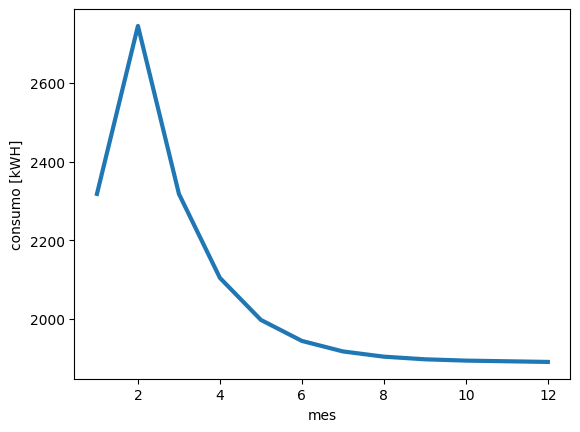

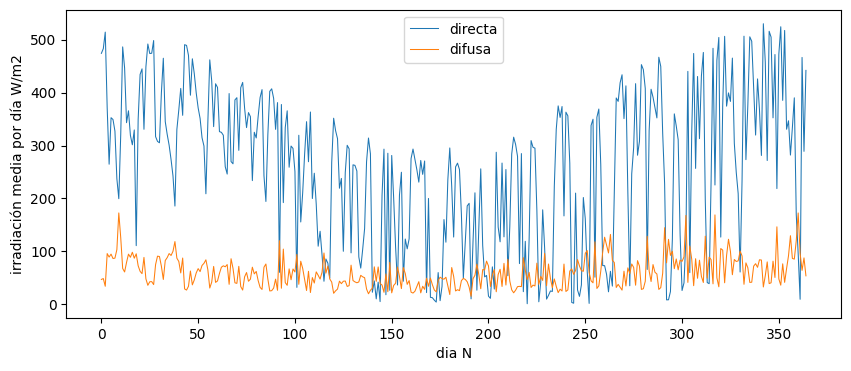

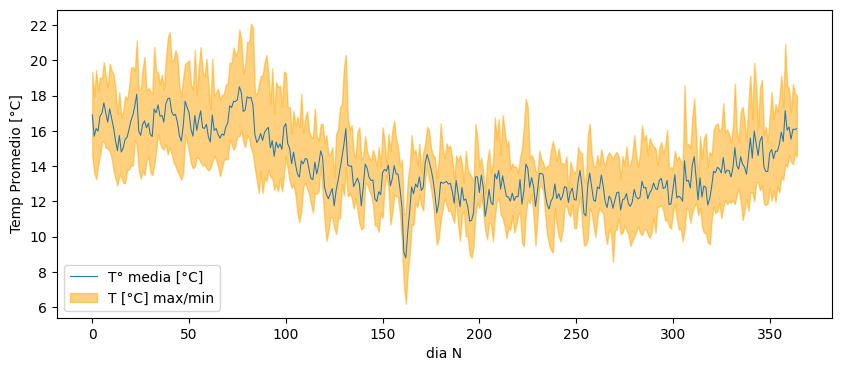

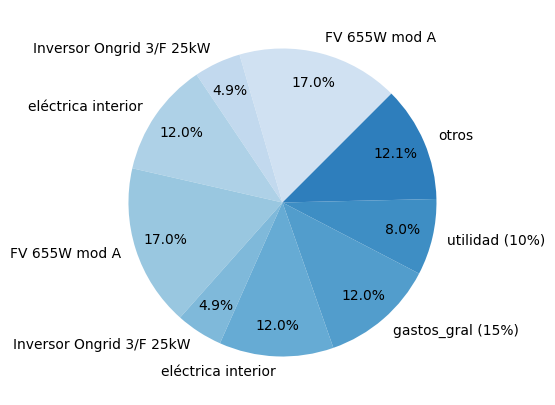

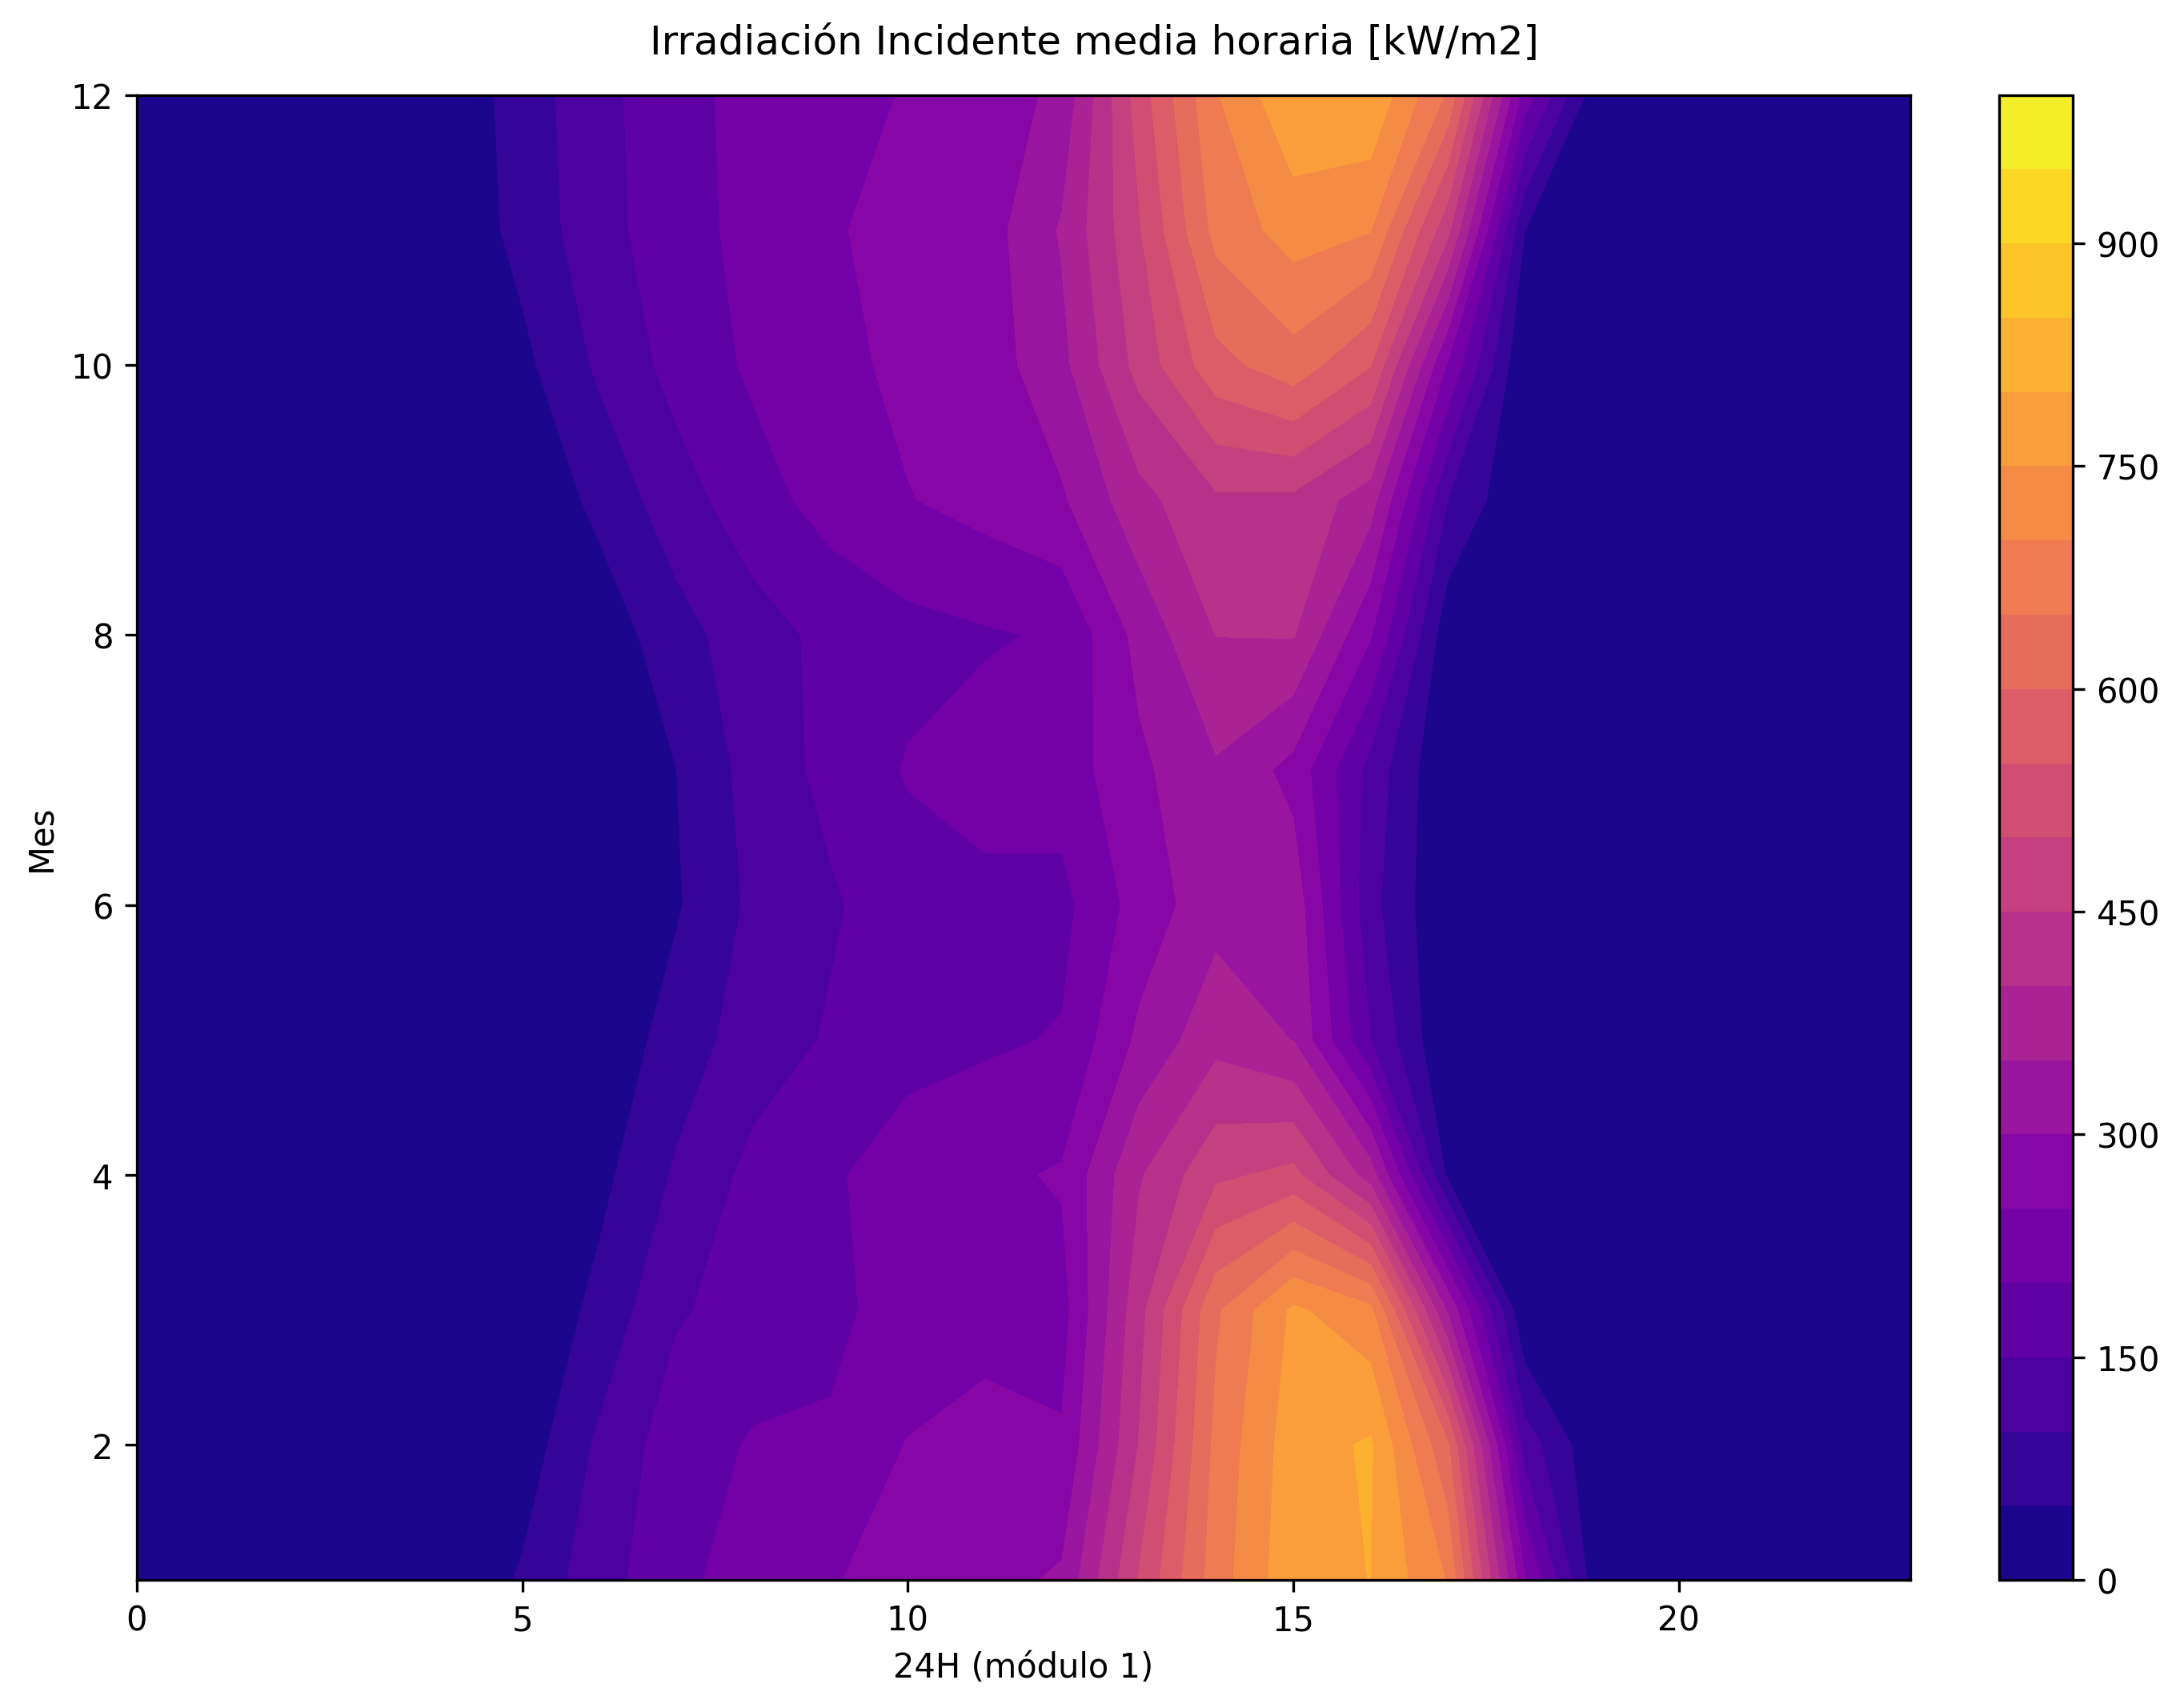

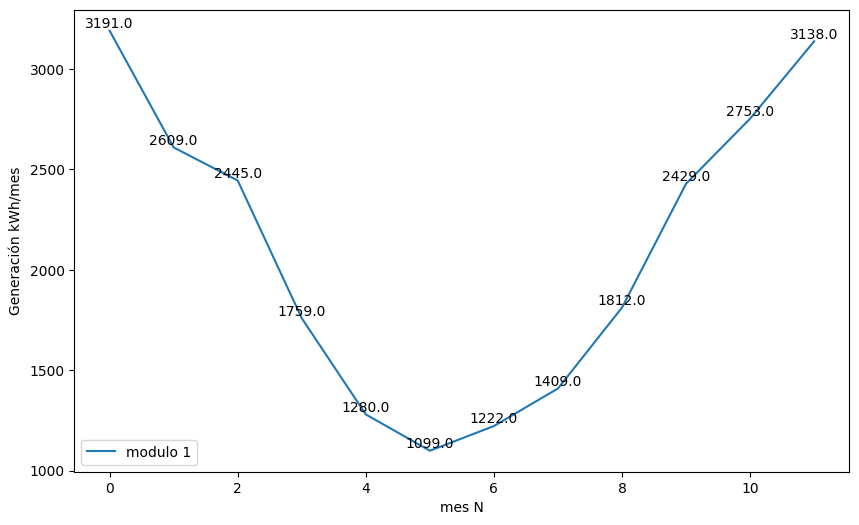

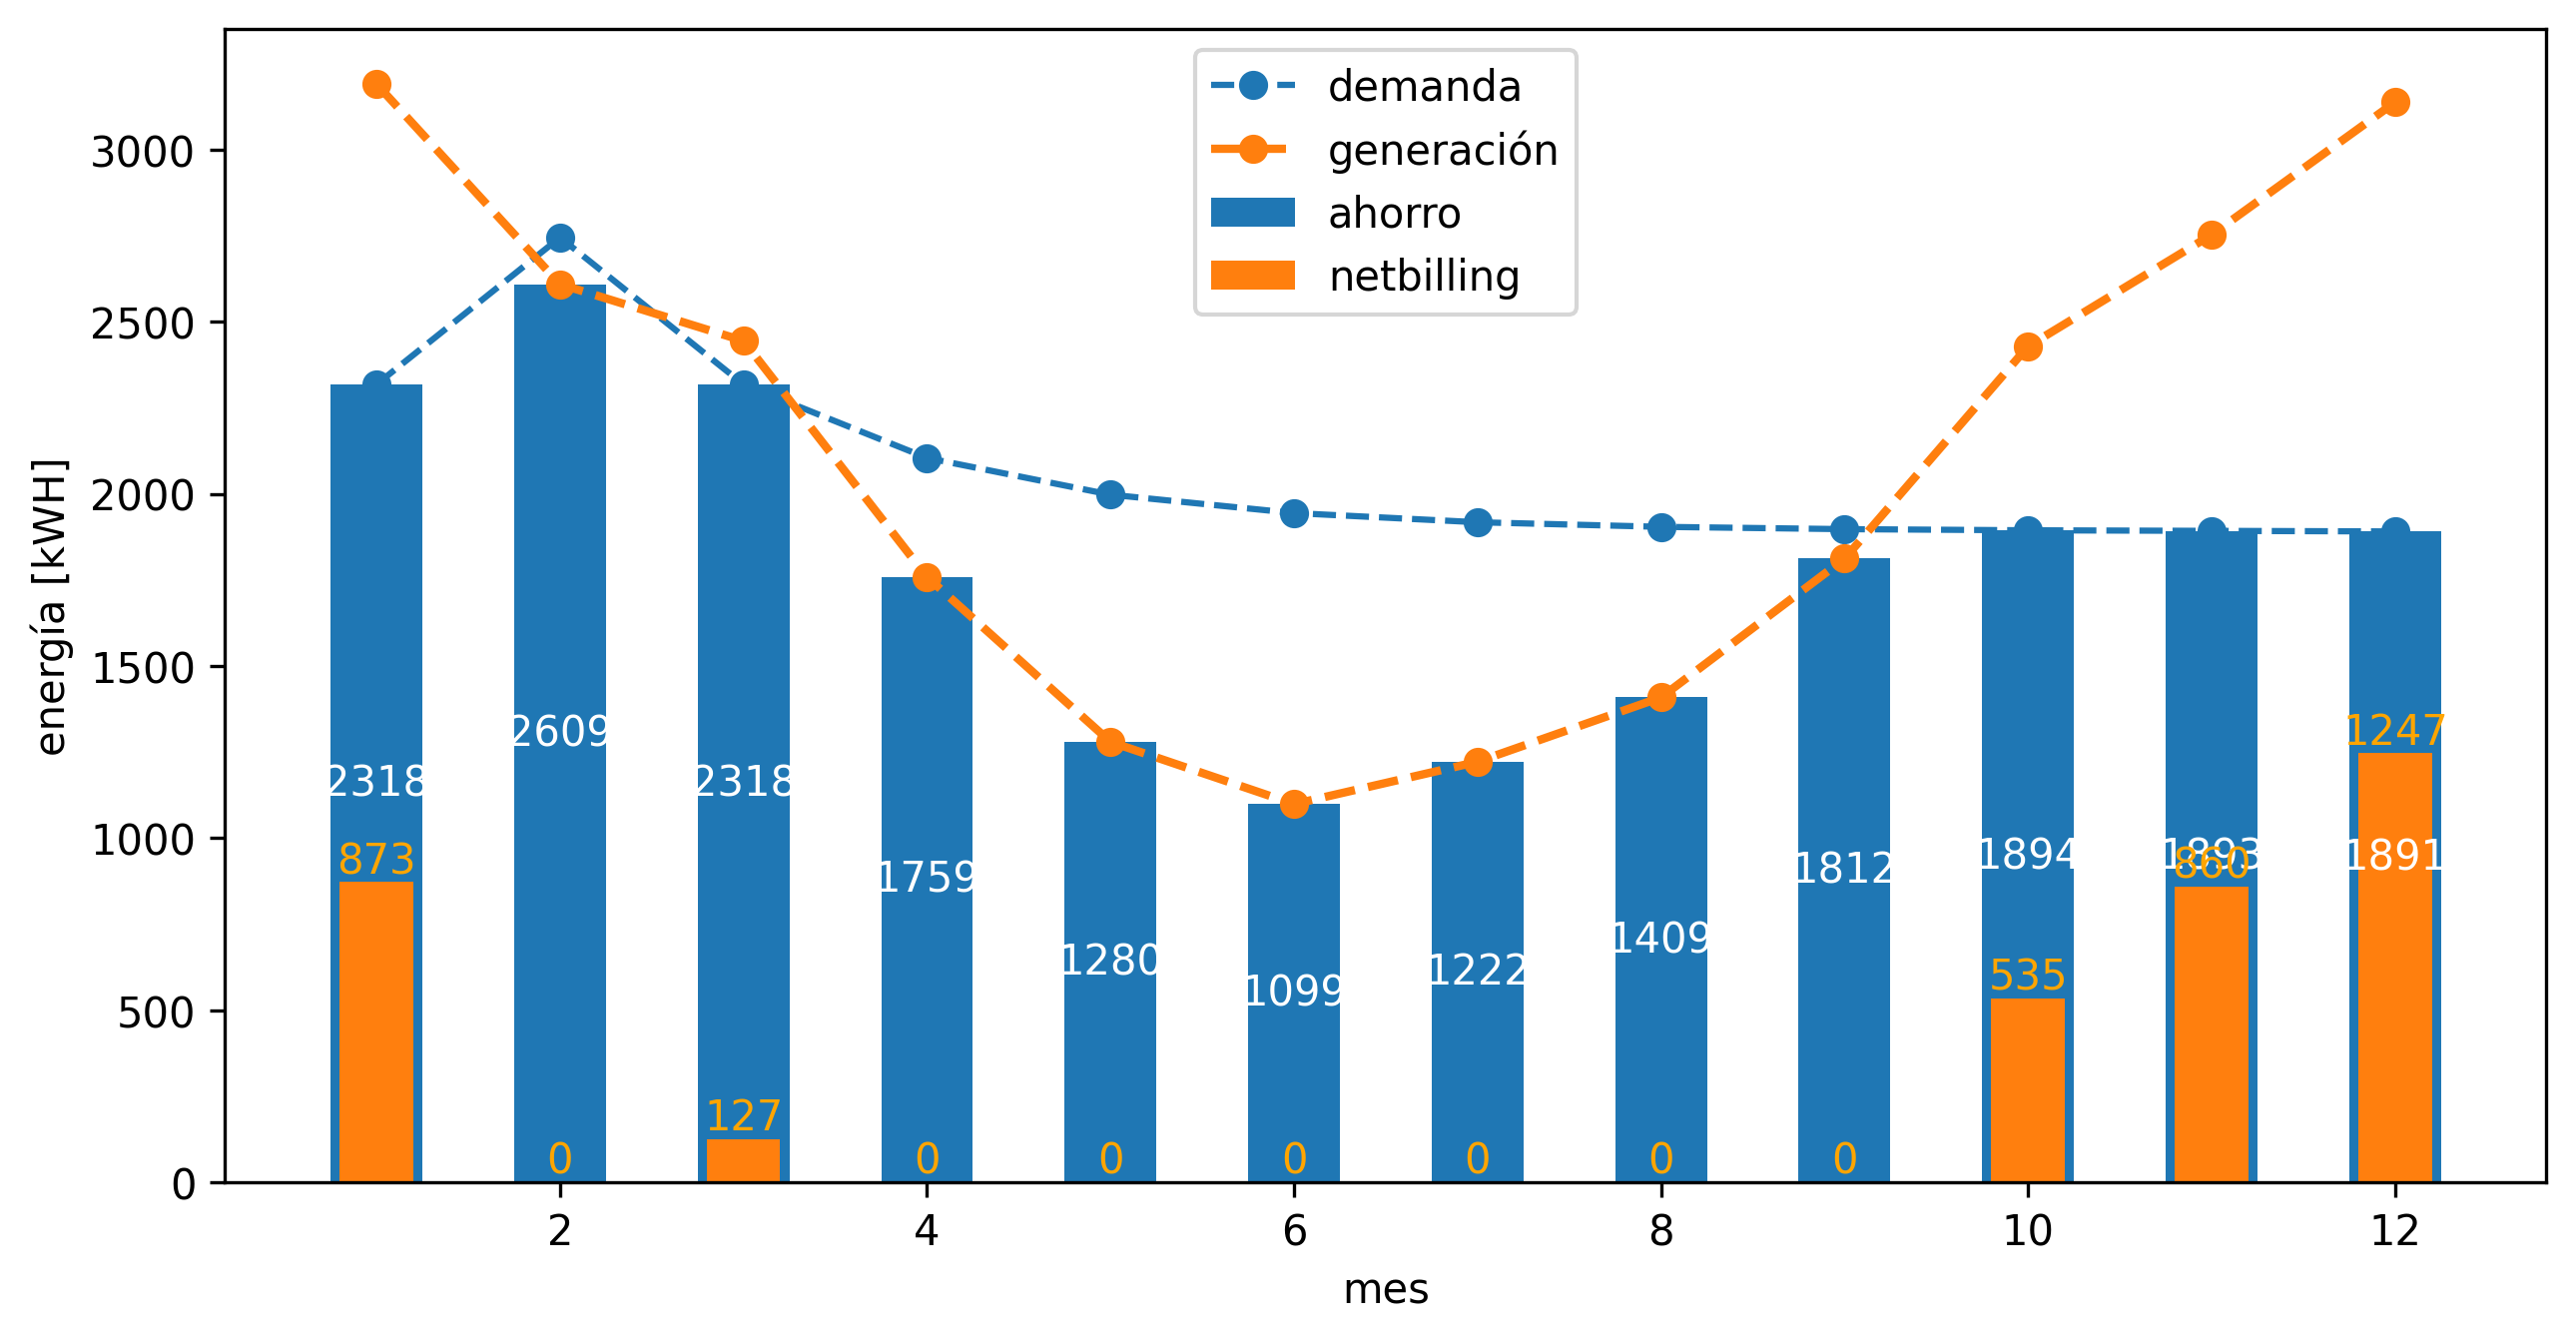

<Figure size 1920x1440 with 0 Axes>

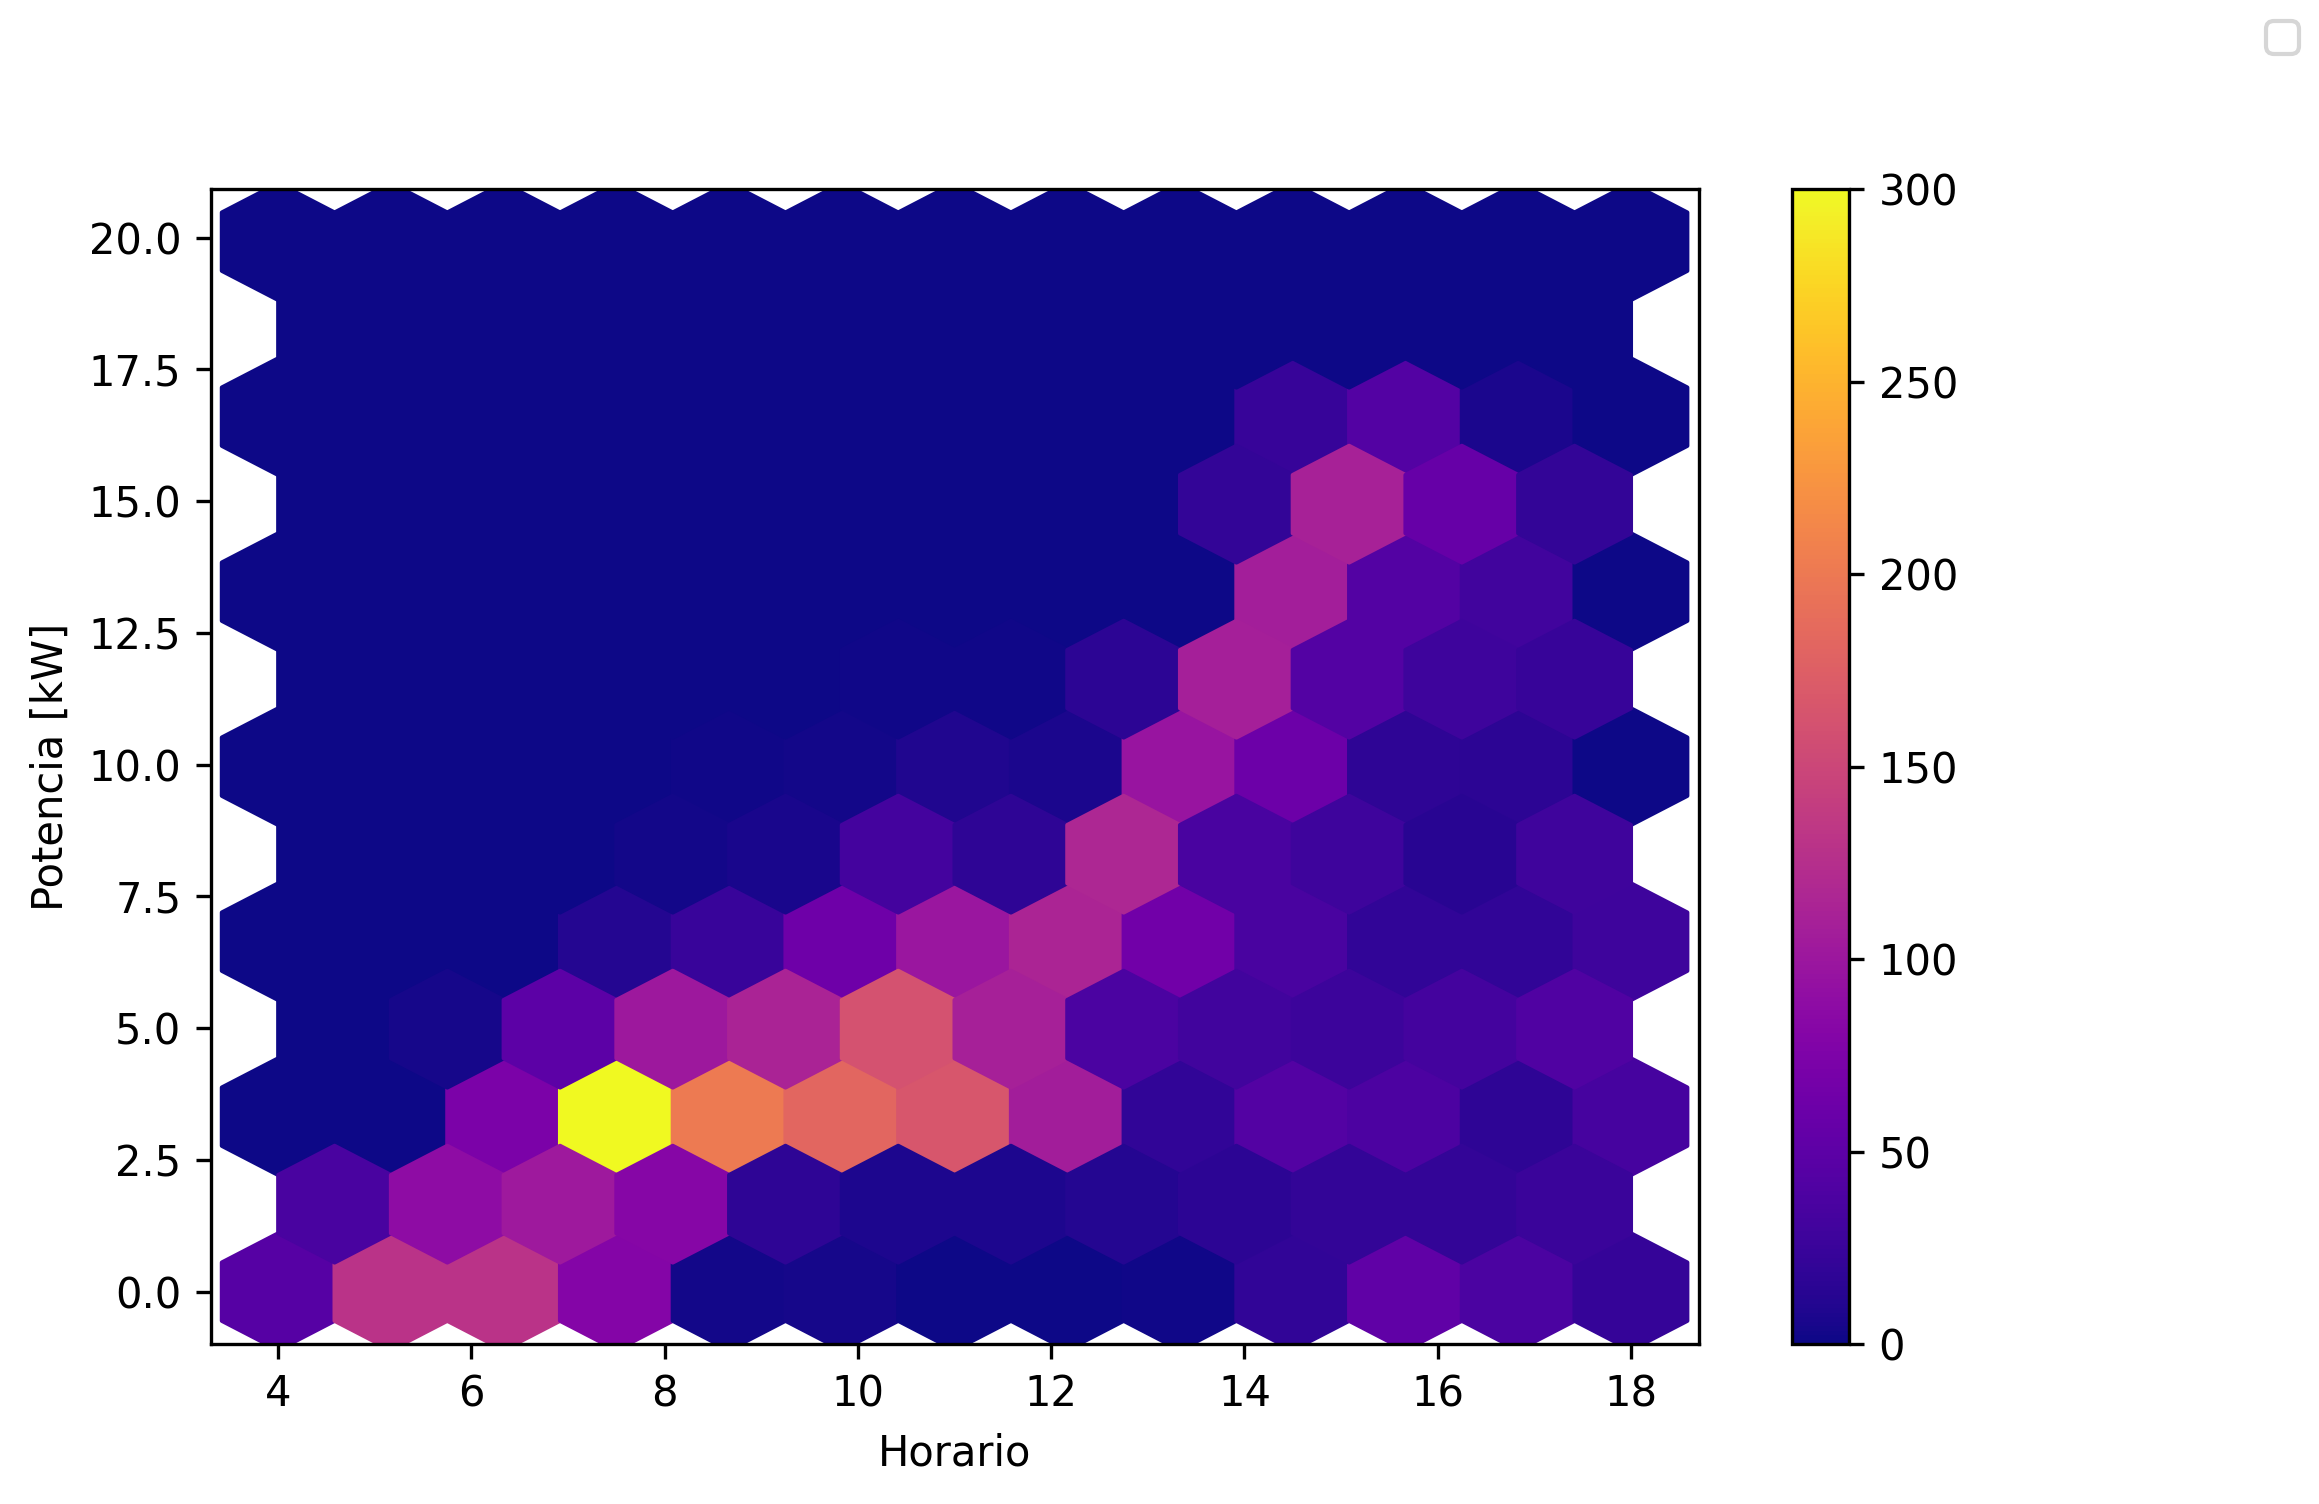

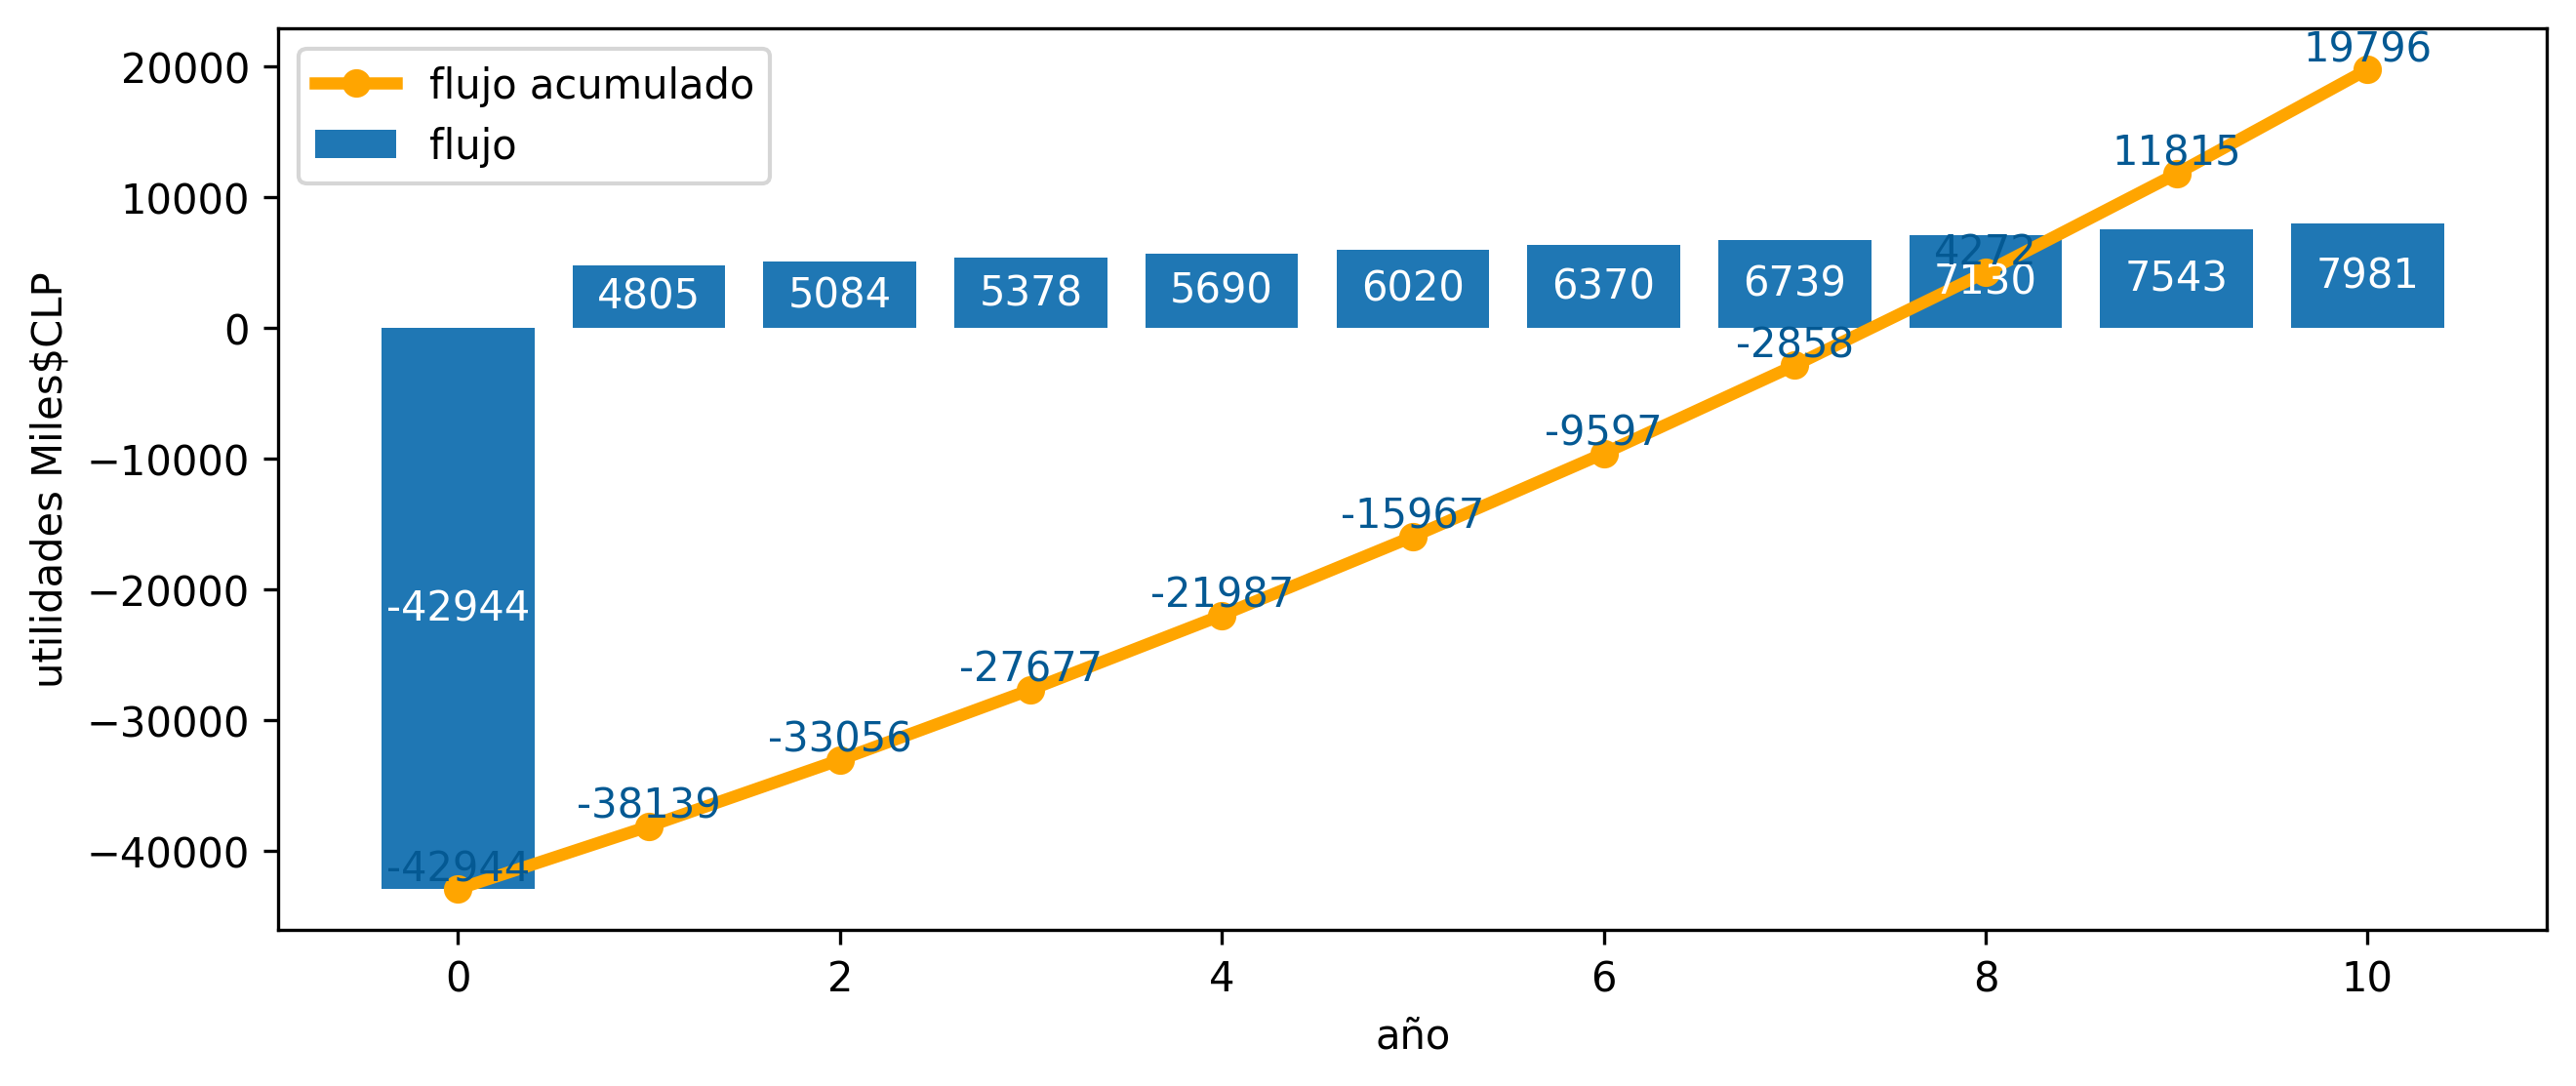

In [10]:
from models.plotter import generate_docs
generate_docs(project)

In [11]:
from html2image import Html2Image


def map_to_image(html_path:str)->None:
    """screenshot html map file to png"""
    hti = Html2Image(browser='edge',size=(640,480),output_path=html_path)
    hti.screenshot(
        html_file=html_path+'map_location'+'.html',
        save_as='map_location'+'.png')
    print(f'{html_path+'map_location.html'} converted to .png')
    
map_to_image("build/r_val_Loft_Waddington/")

FileNotFoundError: build/r_val_Loft_Waddington/map_location.html